In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [49]:
# Load dataset
df = pd.read_csv("C:\\Users\\manoj\\OneDrive\\Documents\\India.csv")

# Check the first few rows
print(df.head(10))

# Get information about the dataset
df.info()

# Get summary statistics
df.describe()


         date  confirmed  vaccines  people_vaccinated  \
0  22-01-2020        NaN       0.0                NaN   
1  23-01-2020        NaN       0.0                NaN   
2  24-01-2020        NaN       0.0                NaN   
3  25-01-2020        NaN       0.0                NaN   
4  26-01-2020        NaN       0.0                NaN   
5  27-01-2020        NaN       0.0                NaN   
6  28-01-2020        NaN       0.0                NaN   
7  29-01-2020        NaN       0.0                NaN   
8  30-01-2020        1.0       0.0                NaN   
9  31-01-2020        1.0       0.0                NaN   

   people_fully_vaccinated  school_closing  workplace_closing  cancel_events  \
0                      NaN             0.0                0.0            0.0   
1                      NaN             0.0                0.0            0.0   
2                      NaN             0.0                0.0            0.0   
3                      NaN             0.0          

,confirmed,vaccines,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
count,7.710000e+02,779.0,4.080000e+02,3.790000e+02,773.000000,769.000000,769.000000,773.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,1.697753e+07,0.0,4.567081e+08,2.639955e+08,-0.869340,-1.802341,-0.479844,-2.789133,-0.682705,-1.574772,-0.905072,2.962289,1.940182,1.433030,0.418726
std,1.471401e+07,0.0,3.441271e+08,2.637703e+08,2.427125,1.460395,1.817858,2.142171,1.335893,1.684778,1.516434,0.871949,0.253230,0.506213,3.645983
min,1.000000e+00,0.0,0.000000e+00,7.668000e+03,-3.000000,-3.000000,-2.000000,-4.000000,-2.000000,-3.000000,-2.000000,0.000000,0.000000,0.000000,-4.000000
25%,2.241874e+06,0.0,1.260910e+08,4.177513e+07,-3.000000,-3.000000,-2.000000,-4.000000,-2.000000,-3.000000,-2.000000,2.000000,2.000000,1.000000,-4.000000
50%,1.096339e+07,0.0,4.355768e+08,1.519088e+08,-2.000000,-2.000000,-2.000000,-4.000000,0.000000,-2.000000,-2.000000,3.000000,2.000000,1.000000,2.000000
75%,3.275341e+07,0.0,7.819688e+08,4.757035e+08,3.000000,-2.000000,2.000000,-2.000000,0.000000,-2.000000,0.000000,4.000000,2.000000,2.000000,4.000000
max,4.298426e+07,0.0,9.679468e+08,8.058866e+08,3.000000,3.000000,2.000000,4.000000,2.000000,3.000000,2.000000,4.000000,2.000000,2.000000,4.000000


In [50]:
# Handle missing values by dropping rows with NaNs
df = df.dropna()

# Drop information_campaigns Column
df = df.drop('information_campaigns', axis=1)

# Check for duplicates
df = df.drop_duplicates()


In [51]:
# Fill missing values in numerical columns with 0 or forward fill based on the nature of the data
df['confirmed'] = df['confirmed'].fillna(0)
df['people_vaccinated'] = df['people_vaccinated'].ffill()
df['people_fully_vaccinated'] = df['people_fully_vaccinated'].ffill()

# For the other columns, fill missing values using forward fill method
df = df.ffill()

In [52]:
# Convert date Column to DateTime
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

# Feature Engineering To see if there is any weekly/monthly pattern in the data
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month


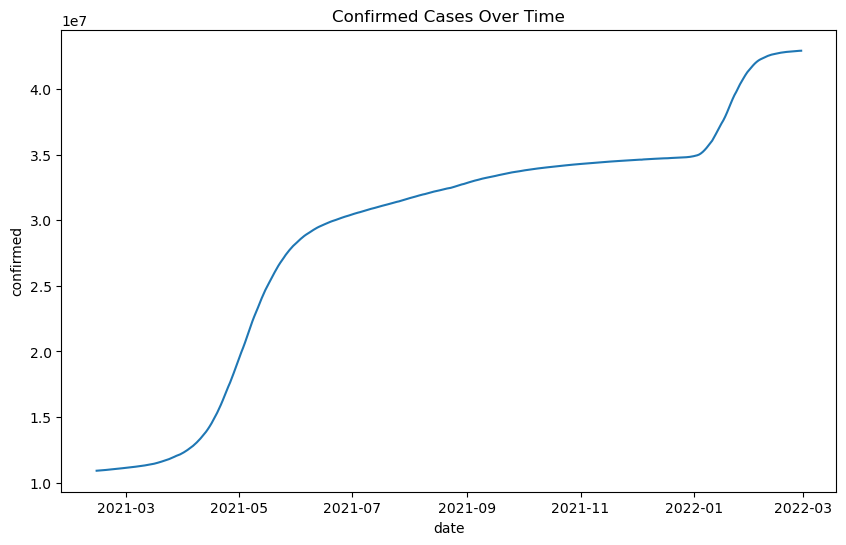

In [53]:
#Exploratory Data Analysis (EDA)
# Check Distribution of Confirmed Cases Over Time
plt.figure(figsize=(10,6))
sns.lineplot(x='date', y='confirmed', data=df)
plt.title('Confirmed Cases Over Time')
plt.show()


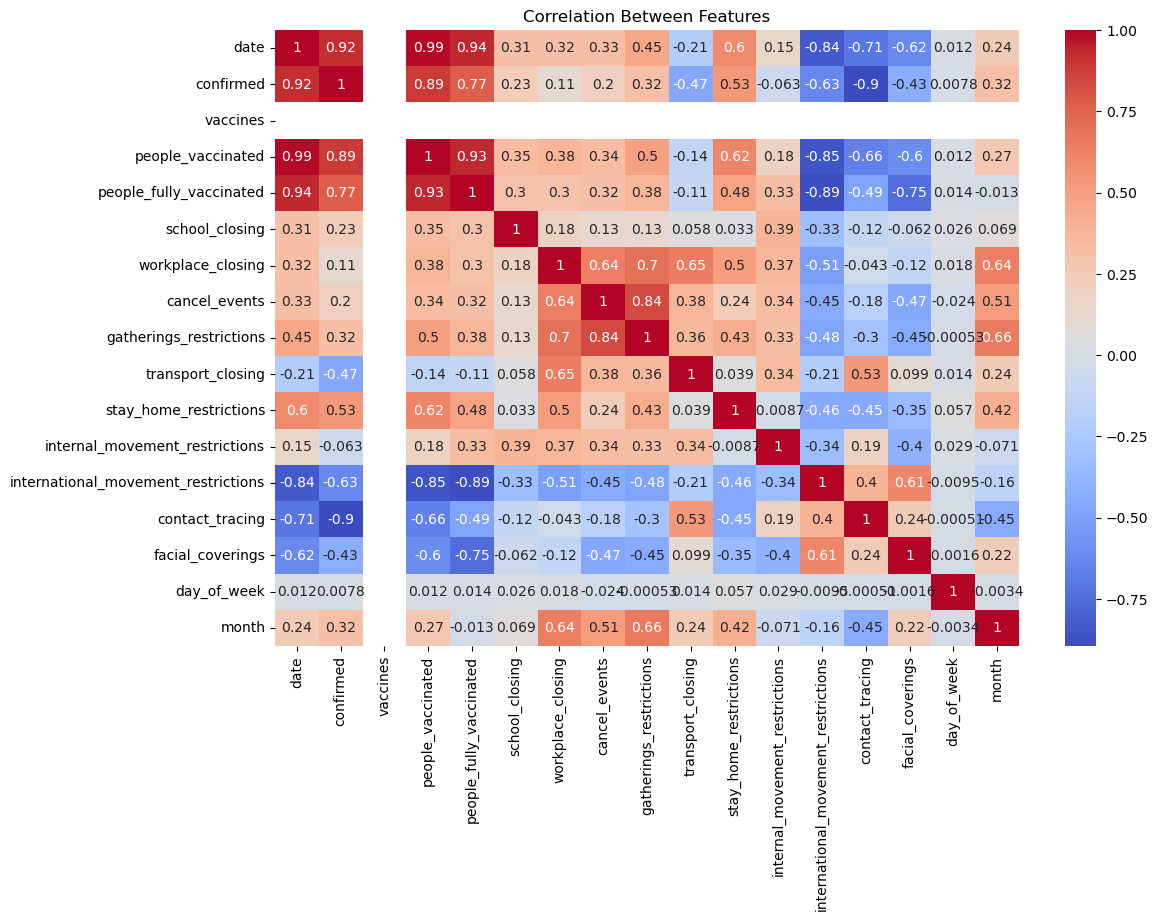

In [54]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Features')
plt.show()

In [55]:
# Data Preprocessing for Modeling
# Drop the 'date' column since it won't be used in the model directly
df_model = df.drop(columns=['date'])

# Separate features and target variable (Let's predict 'confirmed' cases for example)
X = df_model.drop(columns=['confirmed'])
y = df_model['confirmed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [56]:
# Model Building with Linear Regression model.
# Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 1850120654565.7173


In [57]:
import scipy.stats as stats

# Perform T-tests for each unique value of school_closing
school_closing_levels = df['school_closing'].unique()

for level in school_closing_levels:
    group = df[df['school_closing'] == level]['confirmed']
    rest = df[df['school_closing'] != level]['confirmed']
    
    t_stat, p_value = stats.ttest_ind(group, rest)
    
    print(f"T-test for school_closing={level}:")
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")


T-test for school_closing=-3.0:
T-statistic: -1.1065323749751865
P-value: 0.26921896518257843
T-test for school_closing=-2.0:
T-statistic: -1.1995181557029833
P-value: 0.23109825759790592
T-test for school_closing=0.0:
T-statistic: 2.0365729091581053
P-value: 0.0424082686381409
T-test for school_closing=3.0:
T-statistic: 4.311422508158004
P-value: 2.0854622430190492e-05


In [59]:
# Identify constant columns (columns where all values are the same)
constant_columns = [col for col in df.columns if df[col].nunique() == 1]

# Exclude constant columns from the DataFrame
df_non_constant = df.drop(columns=constant_columns)

# Compute Pearson correlation coefficient excluding constant columns
from scipy.stats import pearsonr

# List of columns to compute correlation with 'confirmed'
columns_to_correlate = ['people_vaccinated', 'people_fully_vaccinated']

for column in columns_to_correlate:
    if column in df_non_constant.columns:
        x = df_non_constant['confirmed']
        y = df_non_constant[column]
        
        correlation, p_value = pearsonr(x, y)
        print(f"Correlation between confirmed and {column}: {correlation}, P-value: {p_value}")


Correlation between confirmed and people_vaccinated: 0.8855025797704107, P-value: 1.4730242635210096e-124
Correlation between confirmed and people_fully_vaccinated: 0.76639204166556, P-value: 9.981602454444459e-73


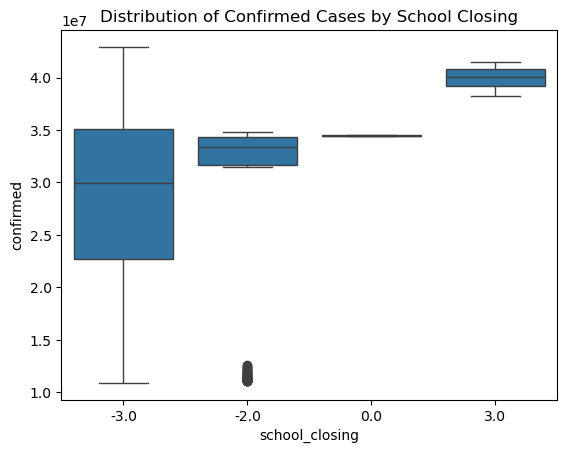

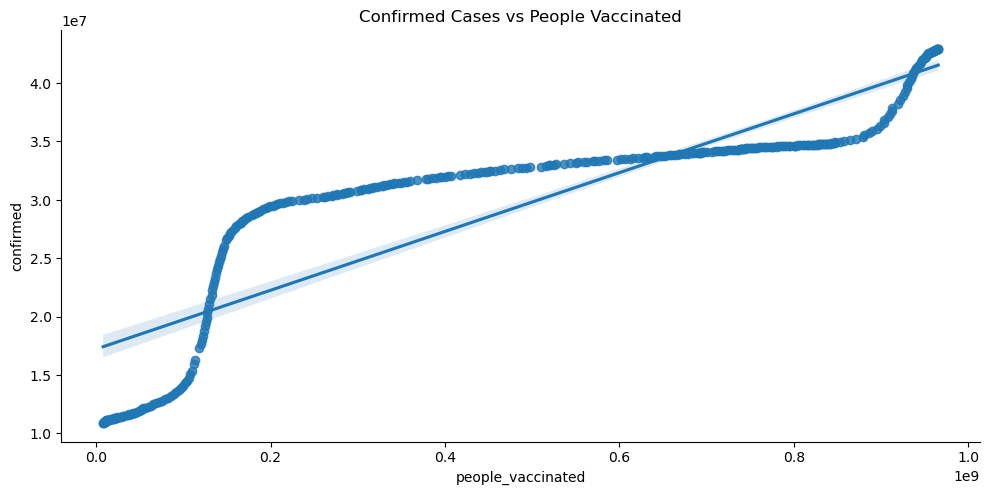

In [60]:
# Boxplot for `school_closing` vs `confirmed`
sns.boxplot(x='school_closing', y='confirmed', data=df)
plt.title('Distribution of Confirmed Cases by School Closing')
plt.show()

# Scatter plot with trend line for `confirmed` vs `people_vaccinated`
sns.lmplot(x='people_vaccinated', y='confirmed', data=df, aspect=2)
plt.title('Confirmed Cases vs People Vaccinated')
plt.show()

In [61]:
# ANOVA
from scipy.stats import f_oneway

# Example data
group1 = df[df['school_closing'] == -3.0]['confirmed']
group2 = df[df['school_closing'] == -2.0]['confirmed']
group3 = df[df['school_closing'] == 0.0]['confirmed']
group4 = df[df['school_closing'] == 3.0]['confirmed']

anova_result = f_oneway(group1, group2, group3, group4)
print(f"ANOVA results: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

# Regression Analysis
import statsmodels.api as sm

X = df[['school_closing', 'workplace_closing', 'cancel_events']]
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = df['confirmed']

model = sm.OLS(y, X).fit()
print(model.summary())


ANOVA results: F-statistic = 7.924768378090304, p-value = 3.913685928815941e-05
                            OLS Regression Results                            
Dep. Variable:              confirmed   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     11.08
Date:                Wed, 18 Sep 2024   Prob (F-statistic):           5.60e-07
Time:                        18:01:35   Log-Likelihood:                -6446.3
No. Observations:                 370   AIC:                         1.290e+04
Df Residuals:                     366   BIC:                         1.292e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------